In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import gget

In [6]:
fpath = "/scratch/indikar_root/indikar1/shared_data/geneformer/cell_embeddings/iHSC.h5ad"
emb = sc.read_h5ad(fpath)
print(emb)

AnnData object with n_obs × n_vars = 8574 × 512
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'length'


/home/cstansbu/miniconda3/envs/geneformer/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [14]:
fpath = "/scratch/indikar_root/indikar1/shared_data/geneformer/anndata/iHSC.h5ad"
adata = sc.read_h5ad(fpath)
adata.var_names = adata.var['gene_name'].values
print(adata)

AnnData object with n_obs × n_vars = 8574 × 15065
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_name', 'Chromosome', 'Start', 'End', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'ensembl_id'
    uns: 'HSC_vs_FB', 'HSC_vs_FB_pure', 'clusters', 'fb_vs_hsc_up', 'go_annotations', 'hsc_v_fib_up', 'hvg', 'log1p', 'neighbors', 'panglaodb', 'pca', 'scenic_transcription_factors', 'scrublet', 'tabula_sapiens_deg', 'umap', 'v5_tags'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'filtered_counts', 'raw_counts'
    obsp: 'connectivities', 'distances'


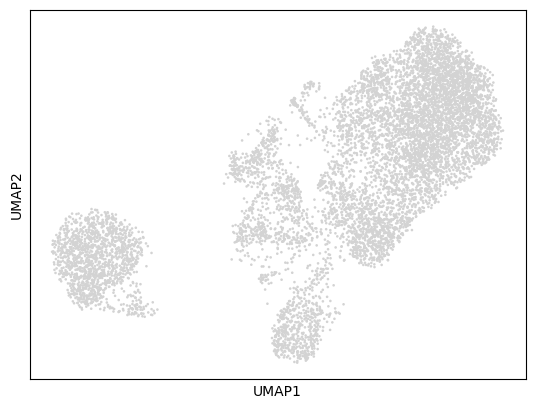

In [15]:
sc.pl.umap(adata)

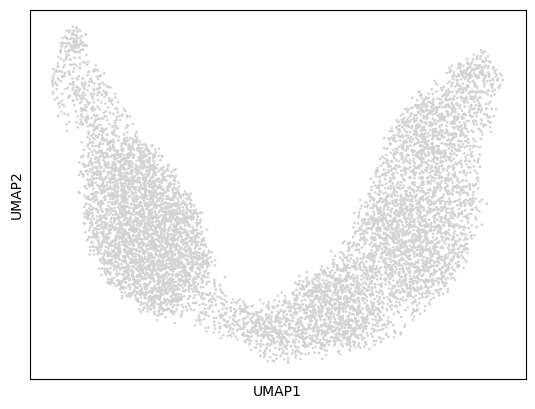

In [10]:
sc.tl.pca(emb)
sc.pp.neighbors(emb)
sc.tl.umap(emb)

sc.pl.umap(emb)

Index(['ENSG00000160072', 'ENSG00000157933', 'ENSG00000142655',
       'ENSG00000149527', 'ENSG00000171621', 'ENSG00000173673',
       'ENSG00000116786', 'ENSG00000131686', 'ENSG00000173614',
       'ENSG00000162592'],
      dtype='object', name='gene_id')

<Axes: >

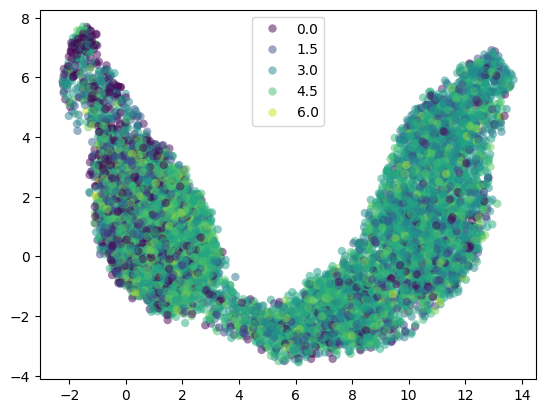

In [29]:
colorby = 'FSTL1'

sns.scatterplot(
    x=emb.obsm['X_umap'][:, 0],
    y=emb.obsm['X_umap'][:, 1],
    hue=adata[:, colorby].X.ravel(),
    palette='viridis',
    ec='none',
    alpha=0.5,
               )

In [27]:
adata[:, 'FSTL1'].X.ravel()

ArrayView([3.400272 , 4.0193467, 0.       , ..., 4.794565 , 3.0260775,
           3.934503 ], dtype=float32)

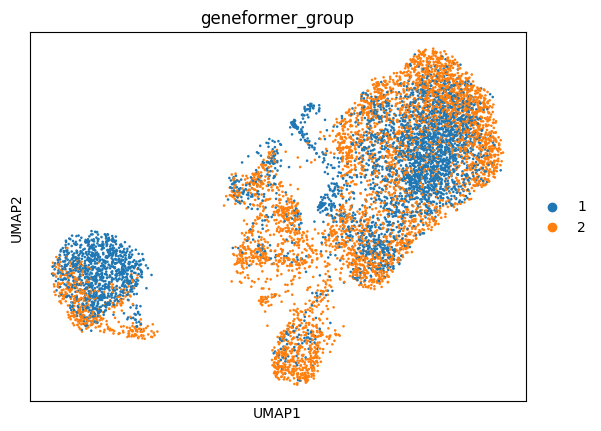

In [32]:
# DEG?

adata.obs['geneformer_group'] = np.where(emb.obsm['X_umap'][:, 0] > 4, "2", "1")
adata.obs['geneformer_group'].value_counts()

sc.pl.umap(adata,
           color=['geneformer_group'])

In [33]:
sc.tl.rank_genes_groups(adata, 
                        groupby='geneformer_group',
                        method='wilcoxon',
                        key_added='geneformer_group',
                        corr_method='benjamini-hochberg')

deg = sc.get.rank_genes_groups_df(adata, 
                                  group=None,
                                  key='geneformer_group')

deg.head()

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,1,FOXL2NB,23.758512,0.168257,8.972590e-125,1.126434e-121
1,1,MOBP,21.460531,0.125483,3.641197e-102,1.613371e-99
2,1,ADAM28,21.308104,0.303127,9.548506e-101,3.785480e-98
3,1,UAP1L1,19.571793,0.083224,2.690460e-85,5.874171e-83
4,1,UHRF2,19.433535,0.108835,4.017276e-84,8.069368e-82


In [2]:
gene_list = deg['names'].head(100).values

edf = gget.enrichr(gene_list, database='ontology')
edf.head()

NameError: name 'deg' is not defined